#### Computational Physics - Fall 2020
#### Shalma Wegsman

## Homework #6

### Problem 1 - Inverse Power Distribution
(A)
To normalize, set:

$$ 1 = \int_0^{\infty} f(x) dx = \int_0^{\infty}\frac{A}{(x+1)^n}dx = A \bigg[ \frac{(x+1)^{-n+1}}{-n+1} \bigg]_0^{\infty} = \frac{A}{n-1}$$ 

$$ \Rightarrow A = n-1$$

So we have normalized f(x): $$f(x) = \frac{n-1}{(x+1)^n}$$

(B)
Let's now compute the cumulative distribution:

$$ P(x) = \int_0^x f(x') dx' = \int_0^x \frac{n-1}{(x'+1)^n}dx' = \frac{n-1}{-n-1} \big[(x'+1)^{-n+1} \big]_0^x = -[(x+1)^{-n+1}-1] $$

Set this equal to r and invert to find:

$$ x(r) = (-r+1)^{1/(1-n)}-1 $$

(C)

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def f(x,n): #to compare
    return((n-1)/((x+1)**n))

In [3]:
r = np.random.random(size=10000)
n=4
x = (-r+1)**(1/(1-n))-1

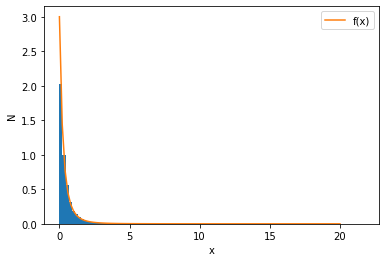

In [45]:
nbins = 100
xx = np.linspace(0,20,100)
yy = [f(i,4) for i in xx]

#fig = plt.figure(1)
#ax = fig.add_subplot(111)

plt.hist(x,bins=nbins,density=True)
plt.plot(xx,yy,label='f(x)')

plt.ylabel('N')
plt.xlabel('x')
#plt.xlim(0,10)
plt.legend()
plt.show()

### Problem 2 - Drunk on a Valley/Hill
(A)

In [4]:
def RandomWalk(k,N): #inputs are the probability of a forward step (k) and number of steps (N)
    loc = 0
    locs=[]
    for n in range(N):
        r = np.random.random()
        if loc==0:
            if r<0.5:
                loc+=1
            else:
                loc-=1
        else:
            if r<k: #moves away from origin
                if loc>0: 
                    loc+=1
                else:
                    loc-=1
            else: #moves towards origin
                if loc>0:
                    loc-=1
                else:
                    loc+=1
        locs.append(loc)
    return(locs)

In [6]:
RandomWalk(0.25,10)

[-1, -2, -1, 0, -1, -2, -1, -2, -1, -2]

(B)

In [57]:
locs25=[]
k=0.25
N=10000
for x in range(1000):
    locs =RandomWalk(k,N)
    for i in range(len(locs)):
        locs25.append(locs[i])

Text(0, 0.5, 'Counts')

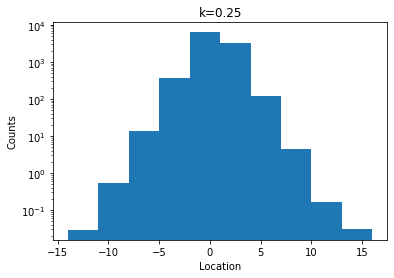

In [65]:
plt.hist(locs25,weights=np.ones(len(locs25))/1000) #to average
plt.yscale('log')
plt.title('k=0.25')
plt.xlabel('Location')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

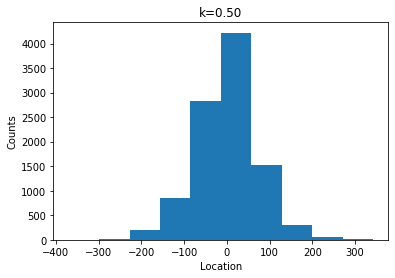

In [66]:
locs50=[]
k=0.5
N=10000
for x in range(1000):
    locs = RandomWalk(k,N)
    for i in range(len(locs)):
        locs50.append(locs[i])

plt.hist(locs50,weights=np.ones(len(locs50))/1000)
plt.title('k=0.50')
plt.xlabel('Location')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

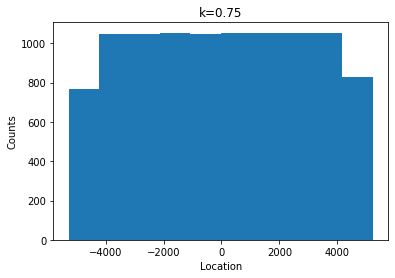

In [67]:
locs75=[]
k=0.75
N=10000
for x in range(1000):
    locs=RandomWalk(k,N)
    for i in range(len(locs)):
        locs75.append(locs[i])
    
plt.hist(locs75,weights=np.ones(len(locs25))/1000)
plt.title('k=0.75')
plt.xlabel('Location')
plt.ylabel('Counts')

In [44]:
rms_25 = []
rms_50 = []
rms_75 = []
N=10000

locs25_array = np.reshape(locs25,(1000,10000))
locs50_array = np.reshape(locs50,(1000,10000))
locs75_array = np.reshape(locs75,(1000,10000))
    
for n in range(N):
    rms_25_i =[]
    rms_50_i =[]
    rms_75_i =[]
    for i in range(1000):
        rms_25_i.append(locs25_array[i][n]**2)
        rms_50_i.append(locs50_array[i][n]**2)
        rms_75_i.append(locs75_array[i][n]**2)
    rms_25.append(np.sqrt(np.sum(rms_25_i)/1000))
    rms_50.append(np.sqrt(np.sum(rms_50_i)/1000))
    rms_75.append(np.sqrt(np.sum(rms_75_i)/1000))

C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'RMS')

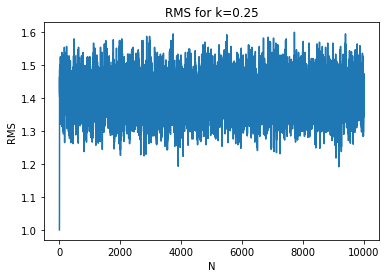

In [45]:
x = np.arange(N)
plt.plot(x,rms_25,label='k=0.25')
plt.title('RMS for k=0.25')
plt.xlabel('N')
plt.ylabel('RMS')

Text(0, 0.5, 'RMS')

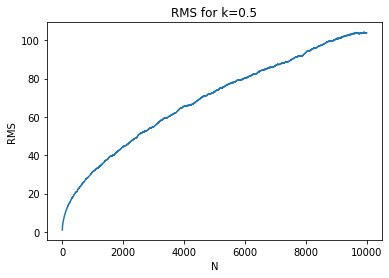

In [46]:
plt.plot(x,rms_50,label='k=0.5')
plt.title('RMS for k=0.5')
plt.xlabel('N')
plt.ylabel('RMS')

Text(0, 0.5, 'RMS')

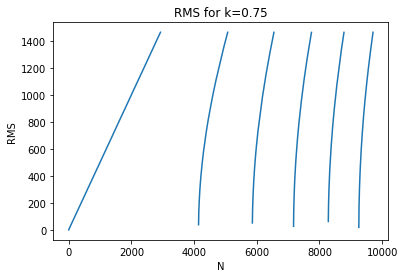

In [47]:
plt.plot(x,rms_75,label='k=0.75')
plt.title('RMS for k=0.75')
plt.xlabel('N')
plt.ylabel('RMS')

For k=0.25, the random walk preferences staying towards the origin, so it makes sense for the rms to stay around there for even high step number N. But for k=0.5, the RMS increases with N. I'm not sure what's going on with k=0.75.

(d)

In [48]:
def OriginTest(k,N):
    loc = 0
    start = 0 # just so the initial location doesn't cause the code to break
    for n in range(N):
        r = np.random.random()
        if loc==0:
            if start ==1:
                return(n)
            start = 1
            if r<0.5:
                loc+=1
            else:
                loc-=1
        else:
            if r<k: #moves away from origin
                if loc>0: 
                    loc+=1
                else:
                    loc-=1
            else: #moves towards origin
                if loc>0:
                    loc-=1
                else:
                    loc+=1
    return(0)

In [49]:
def ProbOrigin(k,N,n):
    count = 0
    for x in range(n):
        c = OriginTest(k,N)
        if c!=0:
            count+=1
    return(count/n)

In [52]:
print('P(returning to origin in N=10000 steps, k=0.2) = ',ProbOrigin(0.2,10000,1000))
print('P(returning to origin in N=10000 steps, k=0.4) = ',ProbOrigin(0.4,10000,1000))
print('P(returning to origin in N=10000 steps, k=0.6) = ',ProbOrigin(0.6,10000,1000))
print('P(returning to origin in N=10000 steps, k=0.8) = ',ProbOrigin(0.8,10000,1000))
print('')
print('P(returning to origin in N=10^6 steps, k=0.2) = ',ProbOrigin(0.2,int(1e6),100))
print('P(returning to origin in N=10^6 steps, k=0.4) = ',ProbOrigin(0.4,int(1e6),100))
print('P(returning to origin in N=10^6 steps, k=0.6) = ',ProbOrigin(0.6,int(1e6),100))
print('P(returning to origin in N=10^6 steps, k=0.8) = ',ProbOrigin(0.8,int(1e6),100))

P(returning to origin in N=10000 steps, k=0.2) =  1.0
P(returning to origin in N=10000 steps, k=0.4) =  1.0
P(returning to origin in N=10000 steps, k=0.6) =  0.646
P(returning to origin in N=10000 steps, k=0.8) =  0.247

P(returning to origin in N=10^6 steps, k=0.2) =  1.0
P(returning to origin in N=10^6 steps, k=0.4) =  1.0
P(returning to origin in N=10^6 steps, k=0.6) =  0.56
P(returning to origin in N=10^6 steps, k=0.8) =  0.28


It looks like over an infinite number of steps, the probability of returning to the origin for k values less than 0.5 is 1. However, for k values above 0.5 the probability converges at less than 1. 

### Problem 3 - Dark Matter Halos

In [129]:
def rho(r,z,Q):
    M_sun = 1 #solar mass, or 1.989 × 10^30 #kg
    rho0 = 0.01*M_sun
    alpha = -1
    beta = 1
    delta = -3
    b_halo = 500 #pc
    m = r**2 + ((z**2)/(Q**2))
    rho_val = (rho0*(m/b_halo)**alpha)*((1 + ((m/b_halo)**beta))**delta)
    return(rho_val)

In [130]:
def MC_int(Q,N):
    int_sum = 0
    for n in range(1,N):
        r = -np.log(np.random.random())
        z = -np.log(np.random.random())        
        rho_val = rho(r,z,Q)
        int_sum +=(np.exp(r)*np.exp(z)*r*rho_val)
    return(2*np.pi*int_sum/N)

In [131]:
MC_int(0.1,100000)

33.67701365945144

In [135]:
N = 1000000
Q = np.logspace(-1,1,50)
int_vals = []
for q in Q:
    int_vals.append(MC_int(q,N))
    
print(int_vals)

[32.643025624841115, 43.379059142940996, 43.390899423276714, 47.81143913675671, 53.254682321435496, 59.85821694240037, 64.8562543458981, 69.09488484822748, 76.0263548048994, 80.96822607013003, 87.72849383806751, 99.46822320210028, 116.69364172608739, 119.38728720961458, 129.75662864018062, 189.96076459526003, 165.26098903595295, 178.9336157873441, 184.43019958996365, 234.0524638275416, 231.01960867307804, 234.8871768386675, 335.22170123598886, 292.8939351351617, 370.8839098600519, 307.69653945003193, 602.2541818584878, 387.59581016747927, 744.7975660298915, 475.911394807572, 509.9555564754666, 543.6575697075361, 637.4292416991681, 568.8065170482654, 563.0397665715659, 638.6894993436242, 1222.236423898308, 983.5070386562463, 772.2659329221578, 753.1623446798862, 773.1635139737518, 821.9558095701009, 848.3681438257174, 894.5502685402145, 1194.106246876293, 1063.2865563122698, 1207.4995757361553, 1229.2944251378249, 1220.9107086062925, 1363.4159852788698]


Text(0, 0.5, 'Halo Mass (Solar Masses)')

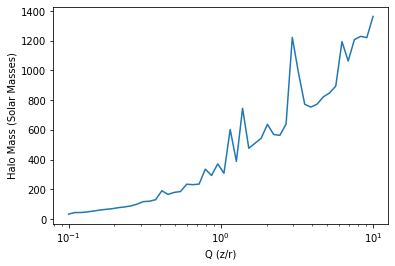

In [136]:
plt.plot(Q,int_vals)
plt.xscale('log')
plt.xlabel('Q (z/r)')
plt.ylabel('Halo Mass (Solar Masses)')